In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
boston_df = pd.read_csv('https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv')

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
feature_list = boston_df.loc[:,'CRIM':'LSTAT'].columns.to_list()

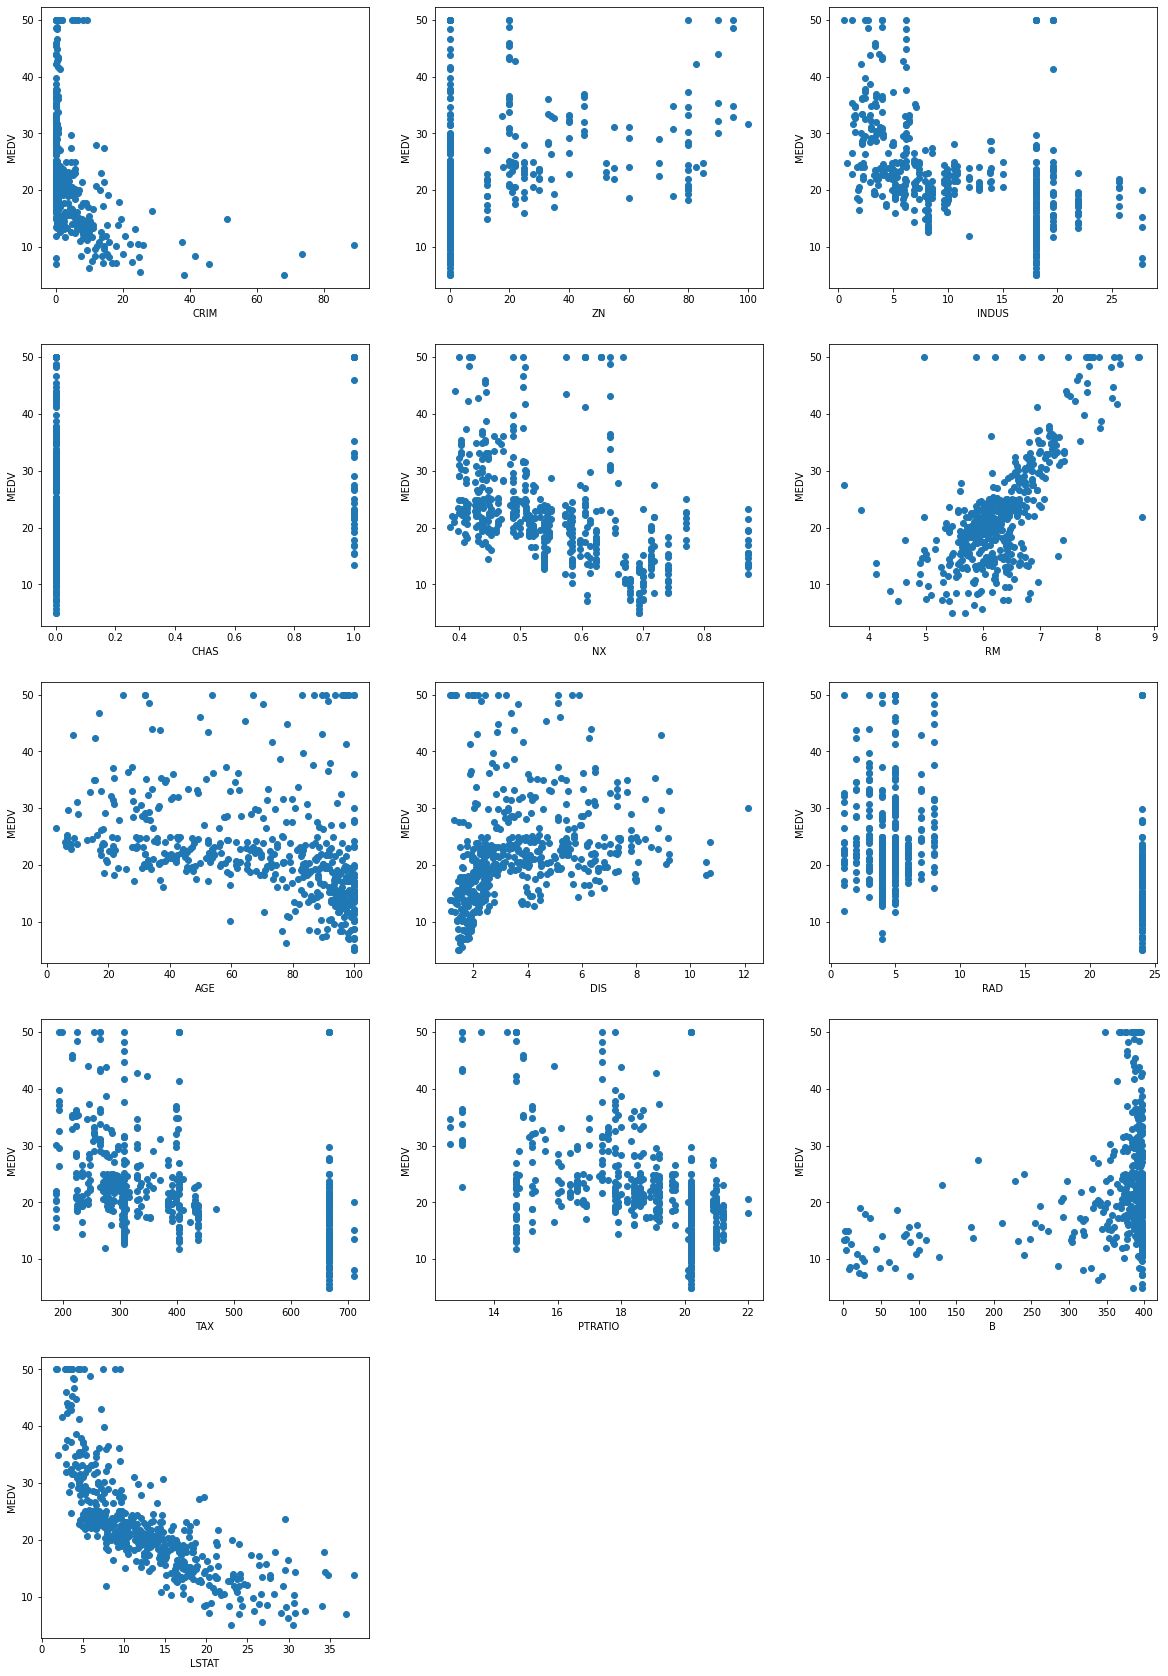

In [5]:
plt.figure(figsize=[20, 30])

for i in range(len(feature_list)):
    plt.subplot(5,3, i+1)
    plt.scatter(boston_df[feature_list[i]], boston_df['MEDV'])
    plt.ylabel('MEDV')
    plt.xlabel(feature_list[i])

plt.show()

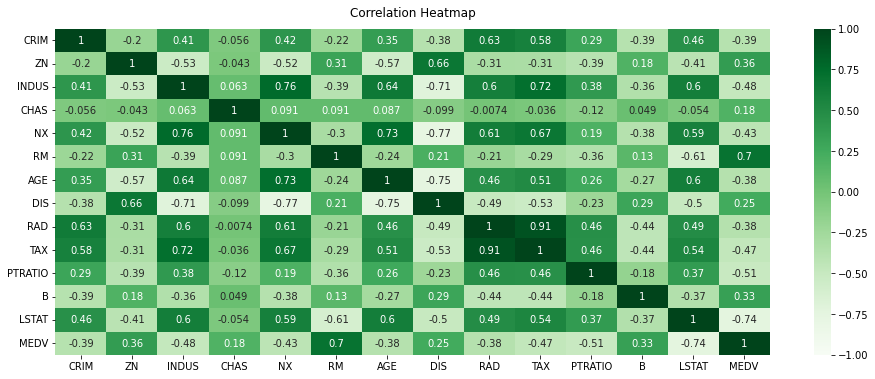

In [6]:
boston_corr = boston_df.corr()

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(boston_corr,vmin=-1,vmax=1,annot=True,cmap="Greens");
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

[Text(0, 0.5, 'MEDV'),
 Text(0, 1.5, 'RM'),
 Text(0, 2.5, 'ZN'),
 Text(0, 3.5, 'B'),
 Text(0, 4.5, 'DIS'),
 Text(0, 5.5, 'CHAS'),
 Text(0, 6.5, 'AGE'),
 Text(0, 7.5, 'RAD'),
 Text(0, 8.5, 'CRIM'),
 Text(0, 9.5, 'NX'),
 Text(0, 10.5, 'TAX'),
 Text(0, 11.5, 'INDUS'),
 Text(0, 12.5, 'PTRATIO'),
 Text(0, 13.5, 'LSTAT')]

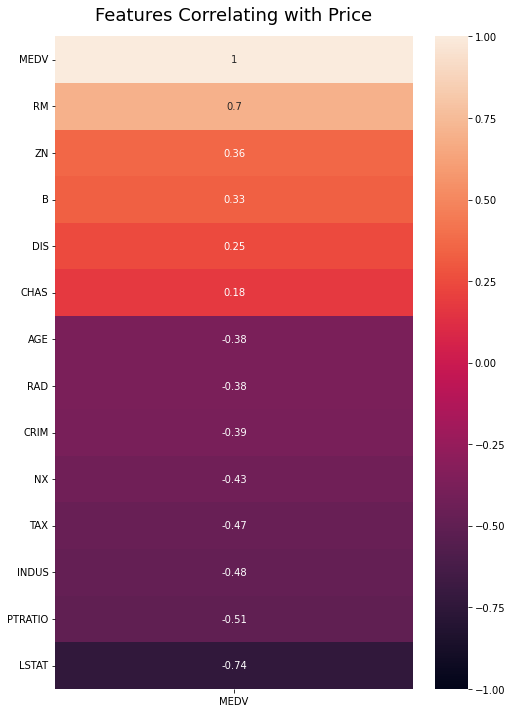

In [7]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(boston_corr[['MEDV']].sort_values(by='MEDV',ascending=False),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
heatmap.set_yticklabels(heatmap.get_yticklabels(),rotation=360)

In [8]:
features_to_retain = ['RM','LSTAT']

X = pd.DataFrame(boston_df[features_to_retain])

y = boston_df['MEDV']

X = scale(X)

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_x = NormalizeData(X)

scaled_x

array([[0.57750527, 0.37721268],
       [0.5479977 , 0.45563903],
       [0.6943859 , 0.35930282],
       ...,
       [0.65433991, 0.38965532],
       [0.61946733, 0.40549141],
       [0.47307913, 0.4318849 ]])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size =0.3,
                                                    random_state = 0)

# Fitting Multi Linear regression model to training model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
  
# predicting the test set results
y_pred = regressor.predict(X_test)

print("y_train shape : ", y_test.shape)
print("y_pred shape : ", y_pred.shape)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error: ',mse)

r2score = r2_score(y_test,y_pred)
print('R2 Score: ',r2score)

y_train shape :  (152,)
y_pred shape :  (152,)
Mean Squared Error:  32.72507169281494
R2 Score:  0.6069792285352373


In [10]:
for i in range(2,11):
    cv_scores = cross_val_score(regressor, scaled_x, y, cv=i)
    print("Average "+ str(i)+"-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 2-Fold CV Score: 0.47749700079314517
Average 3-Fold CV Score: 0.15770514552471815
Average 4-Fold CV Score: 0.2653156019346543
Average 5-Fold CV Score: 0.30956548735415895
Average 6-Fold CV Score: 0.34956825694062577
Average 7-Fold CV Score: 0.31285963327569494
Average 8-Fold CV Score: 0.20831867732084064
Average 9-Fold CV Score: 0.23172663314040884
Average 10-Fold CV Score: -0.033036127682300576


[-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]


C:\Users\Akhil_S_Bhat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.595022953532855

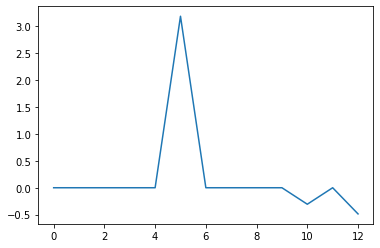

In [11]:
X = boston_df.drop('MEDV',axis=1)

y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 42)

lasso = Lasso(alpha=0.1,normalize=True)

lasso.fit(X_train,y_train)

lasso_coef = lasso.coef_

print(lasso_coef)

plt.plot(range(len(feature_list)), lasso_coef)

lasso_pred = lasso.predict(X_test)

lasso.score(X_test,y_test)

In [12]:
X = boston_df.drop('MEDV',axis=1)
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 31)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.6689764459176661
test score:  0.738895363008736
number of features used:  11


In [13]:
lasso001 = Lasso(alpha=0.01)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.7244472836262167
test score for alpha =0.01:  0.7547067165510453
number of features used: for alpha =0.01: 13


In [14]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7248217034367477
test score for alpha =0.0001:  0.7567559318144098
number of features used: for alpha =0.0001: 13


In [15]:
X = boston_df.drop('MEDV',axis=1)
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 31)

ridge = Ridge()
ridge.fit(X_train,y_train)
train_score=ridge.score(X_train,y_train)
test_score=ridge.score(X_test,y_test)
coeff_used = np.sum(ridge.coef_!=0)
print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.722965063220014
test score:  0.7512895046791437
number of features used:  13


In [16]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train,y_train)
train_score001=ridge.score(X_train,y_train)
test_score001=ridge.score(X_test,y_test)
coeff_used001 = np.sum(ridge.coef_!=0)
print ("training score:", train_score001) 
print ("test score: ", test_score001)
print ("number of features used: ", coeff_used001)

training score: 0.724821146238814
test score:  0.7566907498707625
number of features used:  13


In [17]:
ridge00001 = Ridge(alpha=0.0001, max_iter=10e5)
ridge00001.fit(X_train,y_train)
train_score00001=ridge00001.score(X_train,y_train)
test_score00001=ridge00001.score(X_test,y_test)
coeff_used00001 = np.sum(ridge00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7248217414107105
test score for alpha =0.0001:  0.7567735057213678
number of features used: for alpha =0.0001: 13


In [18]:
warnings.filterwarnings('ignore')

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.738895363008736
Tuned ElasticNet MSE: 21.476776316243853


In [51]:
X

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [62]:
scaled_X = NormalizeData(X)

scaled_y = NormalizeData(y)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size =0.3, random_state = 31)

## XGBoost using Tree Based Learners

In [57]:
import xgboost as xgb

In [63]:
warnings.filterwarnings('ignore')
xg_reg = xgb.XGBRegressor(objective='reg:squarederror',seed=123,n_estimators=10)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(preds,y_test))
print('RMSE: %f' %(rmse))

RMSE: 0.083196


## XG Boost using Linear Base Learners

In [64]:
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)
params = {'booster':'gblinear','objective':'reg:squarederror'}
xg_reg = xgb.train(dtrain=DM_train,params=params,num_boost_round=5)
preds = xg_reg.predict(DM_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))
print('RMSE: %f' %(rmse))

RMSE: 1.920780


## XG Boost with Cross Validation

In [65]:
warnings.filterwarnings('ignore')
housing_dmatrix = xgb.DMatrix(data=scaled_X,label=scaled_y)
params={'objective':'reg:squarederror','max_depth':4}
cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=5,metrics='rmse',as_pandas=True,seed=123)
print(cv_results['test-rmse-mean'].tail(1))

4    0.087488
Name: test-rmse-mean, dtype: float64


In [66]:
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)
print(cv_results['test-mae-mean'].tail(1))

4    0.06695
Name: test-mae-mean, dtype: float64


## Adding L2 Regularization to XG Boost model

In [67]:
housing_dmatrix = xgb.DMatrix(data=scaled_X,label=scaled_y)
reg_params = [1,10,100]
params = {'objective':'reg:squarederror','max_depth':4}
rmse_l2 = []
for reg in reg_params:
    params['lambda'] = reg
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=5,metrics='rmse',as_pandas=True,seed=123)
    rmse_l2.append(cv_results_rmse['test-rmse-mean'].tail(1).values[0])
    
print(pd.DataFrame(list(zip(reg_params,rmse_l2)),columns=['l2','rmse']))    

    l2      rmse
0    1  0.087488
1   10  0.101854
2  100  0.140054


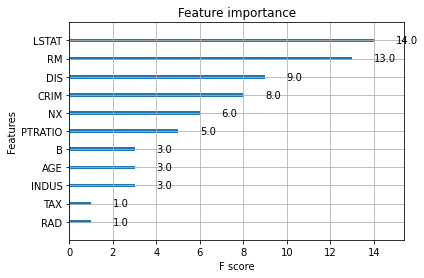

In [103]:
xg_reg = xgb.train(params=params,dtrain=housing_dmatrix,num_boost_round=5)
xgb.plot_importance(xg_reg)
plt.show()

## Hyperparamter Tuning

In [82]:
params = {'objective':'reg:squarederror','max_depth':4,'lambda':1}
num_rounds = [5,10,15,50]
final_rmse_per_round = []
for curr_num_rounds in num_rounds:
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=curr_num_rounds,metrics='rmse',as_pandas=True,seed=123)
    final_rmse_per_round.append(cv_results['test-rmse-mean'].tail().values[-1])

In [83]:
num_rounds_rmses = list(zip(num_rounds,final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=['num_boosting_rounds','rmse']))

   num_boosting_rounds      rmse
0                    5  0.087488
1                   10  0.072045
2                   15  0.069171
3                   50  0.066657


In [90]:
params = {'objective':'reg:squarederror','max_depth':4,'lambda':1}
eta_vals = [0.001,0.01,0.1,0.25,0.5,0.75,1]
best_rmse = []
for curr_val in eta_vals:
    params['eta'] = curr_val
    cv_results = xgb.cv(dtrain=housing_dmatrix,params=params,nfold=4,num_boost_round=50,metrics='rmse',as_pandas=True,seed=123)
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])
eta_vals_rmse = list(zip(eta_vals,best_rmse))
print(pd.DataFrame(eta_vals_rmse,columns=['eta','best_rmse']))

     eta  best_rmse
0  0.001   0.222601
1  0.010   0.157429
2  0.100   0.070220
3  0.250   0.067765
4  0.500   0.070585
5  0.750   0.076840
6  1.000   0.088393


In [101]:
params = {'objective':'reg:squarederror','lambda':1,'eta':0.25}
max_depths = np.arange(1,50).tolist()
best_rmse = []
for curr_val in max_depths:
    params['max_depth'] = curr_val
    cv_results = xgb.cv(dtrain=housing_dmatrix,metrics='rmse',params=params,nfold=4,num_boost_round=50,seed=123,as_pandas=True)
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])
depth_rmse = list(zip(max_depths,best_rmse))
print(pd.DataFrame(depth_rmse,columns=['max_depth','best_rmse']).sort_values('best_rmse')['max_depth'].values[0])
print(pd.DataFrame(depth_rmse,columns=['max_depth','best_rmse']).sort_values('best_rmse')['best_rmse'].values[0])

4
0.06776525


In [102]:
params = {'objective':'reg:squarederror','lambda':1,'eta':0.25,'max_depth':4}
colsample_bytree_vals = [0.1,0.5,0.8,1]
best_rmse = []
for curr_val in colsample_bytree_vals:
    params["colsample_bytree"] = curr_val
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4,num_boost_round=50, metrics="rmse", as_pandas=True, seed=123)
    best_rmse.append(cv_results['test-rmse-mean'].tail().values[-1])
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree  best_rmse
0               0.1   0.103418
1               0.5   0.072561
2               0.8   0.074407
3               1.0   0.067765
